In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


Loading & Adjusting Data

In [80]:
df = pd.read_csv('cryptodata.csv')

feature_columns = []
target_columns = []

for i in df.columns:
    if i == 'Index':
        target_columns.append(i)
        feature_columns.append(i)
    else:
        feature_columns.append(i)

In [74]:
#Data Normalization
scaler = MinMaxScaler(feature_range=(0,1))

x_data = scaler.fit_transform(df[feature_columns].values)
scaler_filename = "crypto_data_scaler.save"
joblib.dump(scaler, scaler_filename)

y_data = scaler.fit_transform(df[target_columns].values)
scaler_filename = "crypto_predict_scaler.save"
joblib.dump(scaler, scaler_filename)

['crypto_predict_scaler.save']

Crypto Prediction Model

In [75]:
#Create Training/Testing Data
avg_day = 20
train_month = 6
pred_month = 2

x_train = []
y_train = []

for x in range(avg_day*train_month, len(x_data)):
    x_train.append(x_data[(x-avg_day*train_month):(x-avg_day*pred_month)])
    y_train.append(y_data[(x-avg_day*pred_month):x])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [82]:
#Create Model
model = Sequential()
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(40, activation='relu'))

model.compile(optimizer ='adam', loss='mse', metrics=['mape'])

In [88]:
#Train Model
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0023 - mape: 13.9490
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0023 - mape: 12.6453
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0022 - mape: 11.8238
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0022 - mape: 11.9991
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0021 - mape: 11.0045
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0022 - mape: 11.8473
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0024 - mape: 13.5509
Epoch 8/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0023 - mape: 13.1396
Epoch 9/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0021 - mape: 11.5458
Epoch 10/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0021 - mape: 11.2989
Epoch 11/50
33/33 [==============================

Testing the Final Model

In [89]:
#Test Model
test_day = 613
actual = df[(test_day - avg_day*pred_month):test_day]['Index'].values
predict = x_data[(test_day - avg_day*train_month):(test_day - avg_day*pred_month)]

predicted = model.predict(np.reshape(predict, (1,predict.shape[0], predict.shape[1])))
predicted = np.reshape(predicted, (-1,1))
predicted_prices = scaler.inverse_transform(predicted)

1/1 [==============================] - 0s 17ms/step


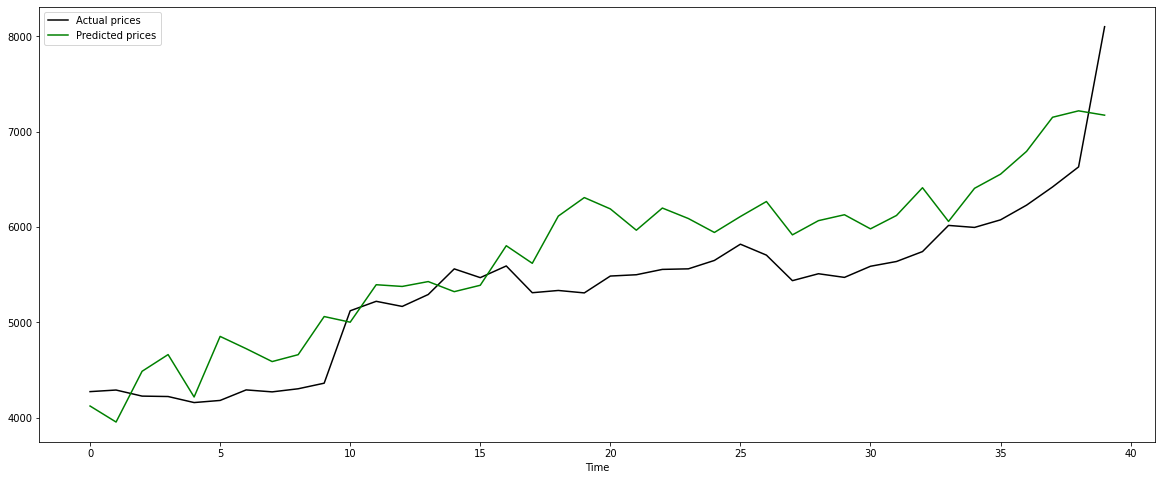

In [90]:
#Graphing results
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(actual, color='black', label='Actual prices')
plt.plot(predicted_prices, color='green', label='Predicted prices')
plt.xlabel('Time')
plt.legend()
plt.show()

In [91]:
model.evaluate(x_train, y_train)

33/33 [==============================] - 0s 2ms/step - loss: 2.8005e-04 - mape: 6.9678


[0.000280052307061851, 6.967783451080322]

In [92]:
model.save('crypto_predict')


INFO:tensorflow:Assets written to: crypto_predict\assets
